# Solution to 1D model (Monte Carlo and exact)

In [2]:
const N_DIMS = 1
include("higher_dim_gcmc.jl")

NVT (generic function with 1 method)

Define model parameters here.

In [3]:
pressures = collect(linspace(0.001, 2.0, 30)) # bar
temperature = 273.0 # K
RT = 8.314 * temperature / 1000.0 # kJ/mol for Qst
n_sites = 100

# For Kr in MIL-91(Al)
site_volume = 12.32 # A^3, motivated by MIL-93(Al)
energy_params = construct_energy_param(ϵ_0=13.0, ϵ=5.5, ϵ_l=3.0)

EnergyParams(3.0,5.5,13.0)

Run isotherm

In [4]:
df_gcmc = run_gcmc_isotherm(pressures, energy_params, n_sites, site_volume, temperature, samples_per_site=50000)

,P,n,l,qst,qst_gh,qst_h,n2,n3,n1n2,desorption_branch
1,0.001,0.00100504,0.21167612,20.168839256636563,23.508764540125995,-1.0702032834894246,1.106e-5,1.31728e-7,2.76e-6,false
2,0.06993103448275861,0.08249124000000001,0.29486648,21.383692016623495,24.296639982405267,-0.6432259657817729,0.0077369676,0.0008030820360000001,0.01476064,false
3,0.13886206896551725,0.18366572,0.39008200000000004,22.150237714077356,24.85577693345217,-0.435817219374834,0.0358696164,0.007395797444,0.06033492,false
4,0.20779310344827587,0.28781284,0.48099739999999996,22.77108486030659,25.31001519371944,-0.2692083334128488,0.0859949244,0.026586150196,0.1275572,false
5,0.2767241379310345,0.39108607999999995,0.5656271199999999,23.216858042301148,25.650511256429592,-0.16393121412842104,0.1569706296,0.064557938312,0.21029444000000003,false
6,0.3456551724137931,0.48489536,0.63966912,23.629970759666854,25.941533461334938,-0.041840701668295566,0.2394309424,0.120283384328,0.29711508,false
7,0.41458620689655173,0.55581036,0.69218244,23.87004927500114,26.121378771219515,0.01839250378167101,0.31305217160000004,0.178569667644,0.36993139999999997,false
8,0.48351724137931035,0.61763728,0.737718,24.114548826808566,26.256458531016907,0.1278122957915655,0.38528903519999996,0.242666708272,0.43821796,false
9,0.552448275862069,0.6683233199999999,0.7737435600000001,24.404283593730995,26.49388109018965,0.18012450354134657,0.4502428876,0.305680394724,0.4973868,false
10,0.6213793103448276,0.7080797200000001,0.80092192,24.56103628564912,26.566266385229632,0.26449190041937554,0.5045605356,0.361757567236,0.54681548,false


Plot results

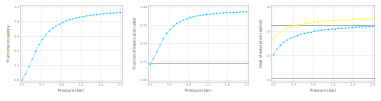

In [5]:
myplot = plot_gcmc_results(df_gcmc, energy_params, temperature)
draw(SVGJS(15inch, 4inch), myplot)

# Exact solution using transfer matrix theory

In [6]:
include("exact_soln.jl")

LangmuirOptU

## Baseline results and comparison with GCMC

Compute adsorption isotherm and other quantities as a function of pressure.

In [7]:
pressures = vcat(collect(linspace(0.00001, 2.0, 200)), collect(linspace(1.05, 50.0, 20)))
df_exact = get_exact_isotherm(pressures, energy_params, n_sites, site_volume, temperature); 

In [8]:
qst_by_differentiation(pressures[end], energy_params, n_sites, site_volume, temperature)

(27.010853529603096,26.0799247458605,-1.3388360275012072)

In [9]:
df_exact[:qst][end]

27.010605816752804

In [10]:
df_exact[:qst_gh][end]

28.34942284530272

In [11]:
for i = 1:length(df_exact[:qst])
    df_exact[:qst_gh][i] = qst_by_differentiation(pressures[i], energy_params, n_sites, site_volume, temperature)[2]
end

Compute inflection point

In [12]:
inflection_pressure, inflection_n = compute_inflection_pt(energy_params, n_sites, site_volume, temperature)

(0.17732723317159116,0.24200170760452824)

Consider two extreme cases, $\epsilon_\ell \rightarrow \pm \infty$.

In [13]:
energy_params_low = deepcopy(energy_params)
energy_params_low.ϵ_l = 10000000.0

energy_params_high = deepcopy(energy_params)
energy_params_high.ϵ_l = -100.0

df_low = get_exact_isotherm(pressures, energy_params_low, n_sites, site_volume, temperature);
df_high = get_exact_isotherm(pressures, energy_params_high, n_sites, site_volume, temperature);

Plot results in three panels.
1. Adsorption isotherm
2. Linker configurations
3. Isosteric heat of adsorption

 in depwarn(::String, ::Symbol) at ./deprecated.jl:64
 in pointer_to_array(::Ptr{UInt32}, ::Tuple{Int64}, ::Bool) at ./deprecated.jl:50 (repeats 2 times)
 in unpack_pango_attr(::Ptr{Void}, ::Symbol) at /home/cory/.julia/v0.5/Compose/src/pango.jl:256
 in unpack_pango_attr_list(::Ptr{Void}) at /home/cory/.julia/v0.5/Compose/src/pango.jl:348
 in (::Compose.##155#156{Base.RefValue{Ptr{Void}}})(::Base.AbstractIOBuffer{Array{UInt8,1}}) at /home/cory/.julia/v0.5/Compose/src/pango.jl:386
 in #sprint#304(::Void, ::Function, ::Int64, ::Function) at ./strings/io.jl:37
 in pango_to_svg(::String) at /home/cory/.julia/v0.5/Compose/src/pango.jl:385
 in draw(::Compose.SVG, ::Compose.TextPrimitive{Tuple{Measures.Length{:

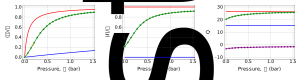

mm,Float64},Measures.Length{:mm,Float64}},Compose.Rotation{Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}}, ::Int64) at /home/cory/.julia/v0.5/Compose/src/svg.jl:935
 in draw(::Compose.SVG, ::Compose.Form{Compose.TextPrimitive{Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}},Compose.Rotation{Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}}}) at /home/cory/.julia/v0.5/Compose/src/svg.jl:781
 in drawpart(::Compose.SVG, ::Compose.Context, ::Compose.IdentityTransform, ::Compose.UnitBox{Float64,Float64,Float64,Float64}, ::Measures.BoundingBox{Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}},Tuple{Measures.Length{:mm,Float64},Measures.Length{:mm,Float64}}}) at /home/cory/.julia/v0.5/Compose/src/container.jl:558
 in drawpart(::Compose.SVG, ::Compose.AdhocContainerPromise, ::Compose.IdentityTransform, ::Compose.UnitBox{Float64,Float64,Float64,Float64}, ::Measures.BoundingBox{Tuple{Measures.Length{:mm,Float64},Measures.Length{

In [14]:
# Adsorption isotherm
using Compose
myplot_n = plot(
    # Exact soln
    layer(x=df_exact[:P], y=df_exact[:n], Geom.line, Theme(default_color=colorant"green", line_width=.6mm)), 
    # GCMC
    layer(x=df_gcmc[:P], y=df_gcmc[:n], Geom.point, Theme(default_color=colorant"green")),
    # two extremes cases
    layer(x=df_high[:P], y=df_high[:n], Geom.line, Theme(default_color=colorant"red", line_width=.6mm)), 
    layer(x=df_low[:P], y=df_low[:n], Geom.line, Theme(default_color=colorant"blue", line_width=.6mm)), 
    # inflection pressure
    Guide.annotation(
           compose(context(), circle([inflection_pressure], [inflection_n], [1mm]), fill(nothing),
           stroke(colorant"orange"))),
#     xintercept=[inflection_pressure],
#     Geom.vline(),
    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.ylabel("⟨𝑛⟩/𝑀"),
#    Guide.title("Adsorption isotherm"),
    Theme(#background_color=colorant"white", 
        panel_stroke=colorant"black",
        grid_color=colorant"Gray", line_width=.7mm, 
        major_label_font_size=14pt, minor_label_font_size=13pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
    Coord.Cartesian(xmax=1.5),
    Guide.xticks(ticks=collect(0.0:0.5:1.5)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0))
#     Guide.manual_color_key("", 
#         ["GCMC", "Exact"], 
#         [colorant"red", colorant"blue"]
#     )
)

# Linker configurations
myplot_l = plot(
    # Exact soln
    layer(x=df_exact[:P], y=df_exact[:l], Geom.line, Theme(default_color=colorant"green", line_width=.6mm)),
    # GCMC
    layer(x=df_gcmc[:P], y=df_gcmc[:l], Geom.point, Theme(default_color=colorant"green")),
#     # Inflection pressure
#     xintercept=[inflection_pressure],
#     Geom.vline(),
    # Two extremes
    layer(x=[0,1.75], y=[0.0, 0.0], Geom.line, 
                Theme(line_width=0.6mm, default_color=colorant"blue")),
    layer(x=[0,1.75], y=[1.0, 1.0], 
                Geom.line, Theme(line_width=0.6mm, default_color=colorant"red")),
    Guide.xlabel("Pressure, 𝑃 (bar)"),
Guide.ylabel("⟨ℓ⟩/𝑀"),
#    Guide.title("Linker configurations"),
    Theme(#background_color=colorant"white", 
        panel_stroke=colorant"black", 
        grid_color=colorant"Gray", line_width=.7mm, 
        major_label_font_size=14pt, minor_label_font_size=13pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
    Coord.Cartesian(xmax=1.5),
    Guide.xticks(ticks=collect(0.0:0.5:1.5)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0))
#     Guide.manual_color_key("", 
#         ["GCMC", "Exact"], 
#         [colorant"red", colorant"blue"]
#     )
)

# Isosteric heat of ads
myplot_qst = plot(
    # Exact soln
    layer(x=df_exact[:P], y=df_exact[:qst], Geom.line, Theme(default_color=colorant"green", 
        line_width=.6mm)), 
    # GCMC
    layer(x=df_gcmc[:P], y=df_gcmc[:qst], Geom.point, Theme(default_color=colorant"green")),
    # only due to host
    # Exact soln
    layer(x=df_exact[:P], y=df_exact[:qst_h]-RT, Geom.line, Theme(default_color=colorant"purple", line_width=.6mm)), 
    # GCMC
    layer(x=df_gcmc[:P], y=df_gcmc[:qst_h]-RT, Geom.point, Theme(default_color=colorant"purple")),
#     Inflection pressurx
#     xintercept=[inflection_pressure],
#     Geom.vline(),
    # Two extremes
    layer(x=[0,1.75], y=[energy_params.ϵ_0 + RT for i=1:2], Geom.line, 
                Theme(line_width=0.6mm, default_color=colorant"blue")),
    layer(x=[0,1.75], y=[energy_params.ϵ_0 + 2 * energy_params.ϵ + RT for i=1:2], 
                Geom.line, Theme(line_width=0.6mm, default_color=colorant"red")),
    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.xticks(ticks=collect(0.0:0.5:1.5)),
    Guide.ylabel("Q<sub>st</sub> (kJ/mol)"),
    Coord.Cartesian(xmax=1.5),
   # Guide.title("Heat of adsorption"),
    Theme(#background_color=colorant"white", 
        panel_stroke=colorant"black", 
        grid_color=colorant"Gray", line_width=.7mm, 
        major_label_font_size=14pt, minor_label_font_size=13pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
#     Guide.manual_color_key("", 
#         ["GCMC", "Exact"], 
#         [colorant"red", colorant"blue"]
#     )
)

draw(SVG(30cm, 8cm), hstack(myplot_n, myplot_l, myplot_qst))
draw(PDF("exact_soln.pdf", 30cm, 8cm), hstack(myplot_n, myplot_l, myplot_qst))

### $Cov(n_1, n_2)$

In [15]:
df_exact[:cov_n1n2] = df_exact[:n1n2] - df_exact[:n] .^ 2
df_gcmc[:cov_n1n2] = df_gcmc[:n1n2] - df_gcmc[:n] .^ 2;

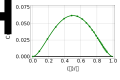

In [16]:
myplot_ninj = plot(
    # Exact sol'n
    layer(x=df_exact[:n], y=df_exact[:cov_n1n2], Geom.line, Theme(default_color=colorant"green",
        line_width=0.7mm)), 
#     GCMC
    layer(x=df_gcmc[:n], y=df_gcmc[:cov_n1n2], Geom.point, Theme(default_color=colorant"green")),
    Guide.xlabel("⟨𝑛⟩/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.yticks(ticks=collect(0.0:0.025:0.075)),
    layer(x=[0.0, 1.0], y=[0.0, 0.0], Geom.line, Theme(default_color=colorant"black", line_width=0.7mm)), 
#     xintercept=[inflection_n],
#     Geom.vline(),
#     Geom.hline(color=colorant"black"),
#     yintercept=[0.0],
    Guide.ylabel("Cov(𝑛<sub>1</sub>, 𝑛<sub>2</sub>)"),
   # Guide.title("Covariance of adjacent cage occupancy"),
    Theme(#background_color=colorant"white", 
        panel_stroke=colorant"black", grid_color=colorant"Gray",
        line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black")
#     Guide.manual_color_key("", 
#         ["GCMC", "Exact"], 
#         [colorant"red", colorant"blue"]
#     )
)

draw(SVG(12cm, 8cm), myplot_ninj)
draw(PDF("twosite.pdf", 12cm, 8cm), myplot_ninj)

## Optimize working capacity

High and low pressures in the pressure-swing adsorption process.

In [17]:
P_H = 1.5 # bar
P_L = 0.1 # bar

0.1

As an example, plot an optimal Langmuir isotherm against an optimal isotherm in our model.

Opt D = 0.7711966662187909
eps_0 = 12.840327 kJ/mol (+ve is favorable)
eps_l = 3.000000 kJ/mol (+ve is unfavorable)
eps = 5.500000 kJ/mol (+ve is favorable)
Langmuir: 

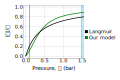

Dict{AbstractString,Float64}(Pair{AbstractString,Float64}("Dopt",0.589574),Pair{AbstractString,Float64}("Kopt",2.58199),Pair{AbstractString,Float64}("Uopt",-20.3697))


In [18]:
opt_energy_params, optD = optimize_working_capacity("ϵ_0", P_H, P_L, energy_params, n_sites, site_volume, temperature)
println("Opt D = ", optD)
print_energy_params(opt_energy_params)
opt_Langmuir = LangmuirOptU(P_H, P_L, site_volume, temperature)
println("Langmuir: ", opt_Langmuir)

p_plot = collect(linspace(0, 2.0))
df_opt = get_exact_isotherm(p_plot, opt_energy_params, n_sites, site_volume, temperature)

D_compare_plot = plot(
    layer(x=p_plot, y=opt_Langmuir["Kopt"] * p_plot ./ (1 + opt_Langmuir["Kopt"] * p_plot), 
    Geom.line, Theme(default_color=colorant"black", line_width=0.7mm)),
    layer(x=df_opt[:P], y=df_opt[:n] , Geom.line, Theme(default_color=colorant"green", line_width=0.7mm)),
    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.ylabel("⟨𝑛⟩/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.5:1.5)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0)),
    Coord.Cartesian(xmax=1.5),
    xintercept=[P_H, P_L],
    Geom.vline(),
    Theme(background_color=colorant"white", panel_stroke=colorant"black", grid_color=colorant"Gray",
        line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt, key_label_font_size=14pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
    Guide.manual_color_key("",
        ["Langmuir", "Our model"], 
        [colorant"black", colorant"green"]
    ),
    #Guide.title("Optimal adsorption curves")
)
draw(SVG(12cm, 8cm), D_compare_plot)
draw(PDF("OptimizeWC_example.pdf", 12cm, 8cm), D_compare_plot)

In [19]:
opt_Langmuir["Kopt"] * P_H / (1 + opt_Langmuir["Kopt"] * P_H) - 
opt_Langmuir["Kopt"] * P_L / (1 + opt_Langmuir["Kopt"] * P_L)

0.5895738076846548

## Find optimum working capacity achievable by fixing $\epsilon$ and $\epsilon_\ell$ and changing $\epsilon_0$.

In [20]:
# Span of parameters
ϵ_span = collect(linspace(0.0, 15.0, 50))
ϵ_l_span = collect(linspace(0.0, 15.0, 50))

# Store optimum deliverable capacity here.
D_opt = zeros(Float64, length(ϵ_span), length(ϵ_l_span))
ϵ_0_opt = zeros(Float64, length(ϵ_span), length(ϵ_l_span))

# Loop over parameter space, optimize deliverable capacity
for (i, ϵ) in enumerate(ϵ_span)
    for (j, ϵ_l) in enumerate(ϵ_l_span)
        baseline_energy_params = deepcopy(energy_params)
        baseline_energy_params.ϵ = ϵ
        baseline_energy_params.ϵ_l = ϵ_l
        
        opt_energy_params, D_opt[i, j] = optimize_working_capacity("ϵ_0", P_H, P_L, 
                baseline_energy_params, n_sites, site_volume, temperature)
        
        ϵ_0_opt[i, j] = opt_energy_params.ϵ_0
        
        # assert we arrived at an optimum
        baseline_energy_params.ϵ_0 = ϵ_0_opt[i, j] - 0.01
        @assert(compute_working_capacity(P_H, P_L, baseline_energy_params, n_sites, site_volume, temperature) <
            D_opt[i, j])
        baseline_energy_params.ϵ_0 = ϵ_0_opt[i, j] + 2 * 0.01
        @assert(compute_working_capacity(P_H, P_L, baseline_energy_params, n_sites, site_volume, temperature) <
            D_opt[i, j])
    end
end

In [21]:
Dopt_levels = 0.45:0.05:1.0
ϵ_0_opt_levels = -5.0:1.0:16.0

-5.0:1.0:16.0

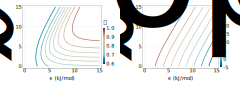

In [22]:
Dopt_plot = plot(
    x=ϵ_span, y=ϵ_l_span, z=D_opt, Geom.contour(levels=8),
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("𝑤<sub>opt</sub>"),
    Guide.title(""),
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
         line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt, 
        key_label_font_size=14pt, key_title_font_size=16pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black"),
)

ϵ_0_opt_plot = plot(
x=ϵ_span, y=ϵ_l_span, z=ϵ_0_opt, Geom.contour(levels=8),
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("ϵ<sub>0, opt</sub>"),
    Guide.title(""),
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
     line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt, 
        key_label_font_size=14pt, key_title_font_size=16pt,
        minor_label_color=colorant"black", major_label_color=colorant"black", 
        key_title_color=colorant"black", key_label_color=colorant"black")
)

using Compose
#shared_title = compose(context(0, 0, 1, 0.1), fontsize(16pt),
#text(0.5, 1.0, "Optimizing working capacity by tuning ϵ<sub>0</sub>", hcenter, vbottom))
#myplot = vstack(shared_title, compose(context(0, 0, 1, 0.9), hstack(Dopt_plot, ϵ_0_opt_plot)))
myplot = hstack(Dopt_plot, ϵ_0_opt_plot)
#draw(PDF("inflection_conditions.pdf", 24cm, 9cm), hstack(p_inflection_plot, n_inflection_plot))
draw(SVG(24cm, 9cm), myplot)
draw(PDF("OptimizeWC.pdf", 24cm, 9cm), myplot)

In [23]:
function orange_colormap(value::Float64)
    n_colors::Int = 500
    cc = colormap("Oranges", n_colors)
    id = floor(Int, value * (n_colors- 1))+1
    return cc[id]
end

orange_colormap (generic function with 1 method)

## Explore parameter space

In [24]:
using Colors

In [25]:
function explore_param_space(which_param::AbstractString, 
                            param_space::Array{Float64},
                            baseline_energy_params::EnergyParams,
                            n_sites::Int, 
                            site_volume::Float64, 
                            temperature::Float64)
    """
    Explore parameter space of a given parameter in model. Plot adsorption isotherms, <l>, Qst.
    
    Parameters:
        which_param: which parameter to explore? "ϵ_0", "ϵ", or "ϵ_l"
        param_space: array of parameters to explore
        pressures: array of pressures for corresponding adsorption isotherm calculation
        baseline_energy_params: gives baseline EnergyParams of other variables that are held constant in this exploration
    """
    if ! (which_param in ["ϵ<sub>0</sub>", "ϵ", "ϵ<sub>ℓ</sub>"])
        @printf("which_param must be:")
        println(["ϵ<sub>0</sub>", "ϵ", "ϵ<sub>ℓ</sub>"])
        error("Pass a valid which_parm")
    end
    # different pressure array for isotherm than Qst and <l>
    # this is for the adsorption isotherm
    pressures_n = collect(linspace(1e-4, 1.5, 300))
    n = zeros(Float64, length(pressures_n), length(param_space))
    # this is for <l>, Qst as a function of n.
    pressures_l_qst = collect(logspace(-5., 4., 300))
    n_l_qst = zeros(Float64, length(pressures_l_qst), length(param_space))
    l = zeros(Float64, length(pressures_l_qst), length(param_space))
    qst = zeros(Float64, length(pressures_l_qst), length(param_space))
    for i = 1:length(param_space)
        # copy baseline energy parameters
        energy_params_here = deepcopy(baseline_energy_params)
        
        # modify the desired parameter
        if which_param == "ϵ<sub>0</sub>"
            energy_params_here.ϵ_0 = param_space[i]
        elseif which_param == "ϵ"
            energy_params_here.ϵ = param_space[i]
        elseif which_param == "ϵ<sub>ℓ</sub>"
            energy_params_here.ϵ_l = param_space[i]
        end
    
        # get the soln with these parameters
        df = get_exact_isotherm(pressures_n, energy_params_here, n_sites, site_volume, temperature)
        n[:, i] = convert(Array, df[:n])
        
        df = get_exact_isotherm(pressures_l_qst, energy_params_here, n_sites, site_volume, temperature)
        n_l_qst[:, i] = convert(Array, df[:n])
        l[:, i] = convert(Array, df[:l])
        qst[:, i] = convert(Array, df[:qst])
    end

    # get colors to represent different parameter values
    colors = colormap("Greens", length(param_space))
    
    # plot adsorption isotherm
    myplot_1 = plot(
        [layer(x=pressures_n, y=n[:, i], 
                Geom.line, 
                Theme(default_color=colors[i], line_width=.6mm)
                )
            for i = 1:length(param_space)]...,
        Guide.manual_color_key(which_param, 
            [@sprintf("%.1f kJ/mol", param_space[i]) for i = 1:length(param_space)], 
            colors
        ),
        Guide.xlabel("Pressure, 𝑃 (bar)"),
        Guide.ylabel("𝑛/𝑀"),
        Guide.title("Adsorption isotherm"),
        Guide.xticks(ticks=collect(0.0:0.5:1.5)),
        Guide.yticks(ticks=collect(linspace(0, 1, 6))),
        Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0),
              panel_opacity=0.8,
              grid_color=colorant"Gray",
              panel_stroke=colorant"black",
              background_color=colorant"white",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black"
        )
    )
    
    # plot linker configs
    colors = colormap("Blues", length(param_space))
    
    myplot_2 = plot(
        [layer(x=n_l_qst[:, i], y=l[:, i], 
                Geom.line, 
                Theme(default_color=colors[i], line_width=.6mm)
                )
            for i = 1:length(param_space)]...,
        Guide.manual_color_key(which_param, 
            [@sprintf("%.1f kJ/mol", param_space[i]) for i = 1:length(param_space)], 
            colors
        ),
        Guide.xlabel("𝑛/𝑀"),
        Guide.ylabel("ℓ/𝑀"),
        Guide.title("Linker configurations"),
        Guide.xticks(ticks=collect(linspace(0, 1, 6))),
        Guide.yticks(ticks=collect(linspace(0, 1, 6))),
        Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
              panel_opacity=0.8,
              grid_color=colorant"Gray",
              panel_stroke=colorant"black",
              background_color=colorant"white",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black"
        )
    )
    
    # qst
    colors = colormap("Reds", length(param_space))
    
    myplot_3 = plot(
    [layer(x=n_l_qst[:, i], y=qst[:, i], 
                Geom.line, 
                Theme(default_color=colors[i], line_width=.6mm)
                )
            for i = 1:length(param_space)]...,
        Guide.manual_color_key(which_param, 
            [@sprintf("%.1f kJ/mol", param_space[i]) for i = 1:length(param_space)], 
            colors
        ),
    Coord.Cartesian(ymin=0., ymax=35.),
        Guide.xlabel("𝑛/𝑀"),
        Guide.ylabel("Q<sub>st</sub> (kJ/mol)"),
        Guide.title("Heat of adsorption"),
        Guide.xticks(ticks=collect(linspace(0, 1, 6))),
        #Guide.yticks(ticks=collect(linspace(0, 1, 11))),
        Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
              panel_opacity=0.8,
              grid_color=colorant"Gray",
              panel_stroke=colorant"black",
              background_color=colorant"white",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black"
        )
    )
    
    save_name = Dict()
    save_name["ϵ"] = "epsilon"
    save_name["ϵ<sub>0</sub>"] = "epsilon_0"
    save_name["ϵ<sub>ℓ</sub>"] = "epsilon_l"
    draw(PDF(@sprintf("%s.pdf", save_name[which_param]), 34cm, 8cm), hstack(myplot_1, myplot_2, myplot_3))
    draw(SVG(34cm, 8cm), hstack(myplot_1, myplot_2, myplot_3))
end

explore_param_space (generic function with 1 method)

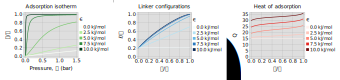

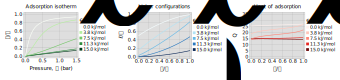

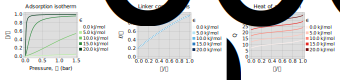

In [26]:
baseline_energy_params = deepcopy(energy_params)

n_params = 5 # explore this many parameters

explore_param_space("ϵ",
    collect(linspace(0.0, 10.0, n_params)),
    baseline_energy_params,
    n_sites,
    site_volume,
    temperature)

explore_param_space("ϵ<sub>ℓ</sub>",
    collect(linspace(0.0, 15.0, n_params)),
    baseline_energy_params,
    n_sites,
    site_volume,
    temperature)

explore_param_space("ϵ<sub>0</sub>",
    collect(linspace(0.0, 20.0, n_params)),
    baseline_energy_params,
    n_sites,
    site_volume,
    temperature)

## Parameter regime such that inflection is present in adsorption isotherm
Explore $\epsilon$-$\epsilon_\ell$ parameter space and compute inflection pressure and loading.

The boundary is approximated by considering the concavity at zero pressure (approximately zero). If second derivative of $n$ wrt $P$ is positive at a low pressure, then the adsorption isotherm starts concave up and will exhibit an inflection since it must saturate at higher pressure.

If getting NaN a lot, change guess in `fzero` in `compute_inflection_pt`.

In [27]:
include("exact_soln.jl")
# Span of parameters
ϵ_span = collect(linspace(0.0, 15.0, 200))
ϵ_l_span = collect(linspace(0.0, 15.0, 200))

# Store pressure and loading at the inflection here.
P_inflection = zeros(Float64, length(ϵ_span), length(ϵ_l_span))
N_inflection = zeros(Float64, length(ϵ_span), length(ϵ_l_span))

# Store d^2 n / dp^2 at a very low pressure here.
d2N_dP2_lowP = zeros(Float64, length(ϵ_span), length(ϵ_l_span))

# Loop over parameter space, compute inflection
for (i, ϵ) in enumerate(ϵ_span)
    for (j, ϵ_l) in enumerate(ϵ_l_span)
        energy_params_inflect = deepcopy(energy_params)
        energy_params_inflect.ϵ = ϵ
        energy_params_inflect.ϵ_l = ϵ_l
        P_inflection[i, j], N_inflection[i, j] = compute_inflection_pt(energy_params_inflect, 
                                    n_sites, site_volume, temperature)
        
        # get solution at a low pressure
        soln_low_P = exact_soln(1.0e-8, energy_params_inflect, n_sites, site_volume, temperature)
        d2N_dP2_lowP[i, j] = soln_low_P["d2n_dp2"]
    end
end

In [28]:
# P_inflection[isnan(P_inflection)] = -1.0
# N_inflection[isnan(N_inflection)] = -1.0

Get path in parameter space along which $\frac{\partial ^2 n}{ \partial p^2}=0$ at low pressure. This is the boundary that distinguishes between parameter regime where inflection is present/absent.

In [29]:
using Contour

c = contour(ϵ_span, ϵ_l_span, d2N_dP2_lowP, 0.0)

# (x, y) along which second deriv. is zero.
xs, ys = coordinates(lines(c)[1])

# layer to pass to Gadfly
inflection_bndry = layer(x=xs, y=ys, 
                            Geom.line(preserve_order=true), 
                            Theme(default_color=colorant"black", line_width=0.7mm)
                        );

@printf("Point ϵ = %f, ϵ_ℓ = %f is on the boundary\n", xs[end], ys[end])

Point ϵ = 6.887362, ϵ_ℓ = 15.000000 is on the boundary


Levels of contours to plot

In [30]:
@printf("N varies from %f to %f\n", minimum(N_inflection), maximum(N_inflection))
@printf("P varies from %f to %f\n", minimum(P_inflection), maximum(P_inflection))
n_levels = 0.05:0.05:0.45
p_levels = 0.1:0.1:1.5

N varies from 0.000041 to 0.475478
P varies from 0.000010 to 1.606686


0.1:0.1:1.5

In [31]:
minimum(N_inflection)

4.111720679441534e-5

Plot boundary of where inflection is present/absent, and pressure/loading at the inflection when it occurs.

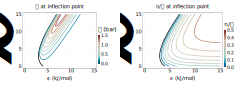

In [32]:
p_inflection_plot = plot(
layer(x=ϵ_span, y=ϵ_l_span, z=P_inflection, Geom.contour(levels=8)),
    inflection_bndry,
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("𝑃 (bar)"),
    Guide.title("𝑃 at inflection point"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black")
)

n_inflection_plot = plot(
layer(x=ϵ_span, y=ϵ_l_span, z=N_inflection, Geom.contour(levels=8)),
    inflection_bndry,
    Guide.xlabel("ϵ (kJ/mol)"),
    Guide.ylabel("ϵ<sub>ℓ</sub> (kJ/mol)"),
    Guide.colorkey("n/𝑀"),
    Guide.title("n/𝑀 at inflection point"),
    Theme(background_color=colorant"white", panel_stroke=colorant"black",
              line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
              key_label_font_size=13pt, key_title_font_size=16pt,
              minor_label_color=colorant"black", major_label_color=colorant"black", 
              key_title_color=colorant"black", key_label_color=colorant"black")
)

# using Compose
# shared_title = compose(context(0., 0., 24cm, 1cm),
#     text(0.5, 1.0, "Conditions for inflection", hcenter, vbottom))
draw(PDF("inflection_conditions.pdf", 24cm, 9cm), hstack(p_inflection_plot, n_inflection_plot))
draw(SVG(24cm, 9cm), hstack(p_inflection_plot, n_inflection_plot))

## Changing temperature

In [33]:
Ts = collect(linspace(150, 400, 5))[end:-1:1]
pressures = collect(logspace(-5.0, 3.0, 500));
dfs_T = [get_exact_isotherm(pressures, energy_params, n_sites, site_volume, Ts[i]) for i = 1:length(Ts)];
for i = 1:length(Ts)
    dfs_T[i][:cov_n1n2] = dfs_T[i][:n1n2] - dfs_T[i][:n] .^ 2
end
colors = colormap("RdBu", length(Ts))

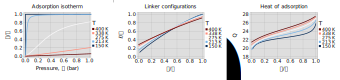

In [34]:
# Adsorption isotherm
myplot_n = plot(
    # Exact soln
    [layer(x=dfs_T[i][:P], y=dfs_T[i][:n], Geom.line, 
        Theme(default_color=colors[i], line_width=.7mm)) for i = 1:length(Ts)]..., 
    Guide.xlabel("Pressure, 𝑃 (bar)"),
    Guide.ylabel("𝑛/𝑀"),
    Guide.title("Adsorption isotherm"),
    Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
      panel_opacity=0.8,
      grid_color=colorant"Gray",
      panel_stroke=colorant"black",
      background_color=colorant"white",
      line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
      key_label_font_size=13pt, key_title_font_size=16pt,
      minor_label_color=colorant"black", major_label_color=colorant"black", 
      key_title_color=colorant"black", key_label_color=colorant"black"
    ),
    Coord.Cartesian(xmax=1.0),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0)),
    Guide.manual_color_key("T", 
        [@sprintf("%d K     ", Ts[i]) for i = 1:length(Ts)], 
        colors
    )
)

# Linker configurations
myplot_l = plot(
    # Exact soln
    [layer(x=dfs_T[i][:n], y=dfs_T[i][:l], Geom.line, 
        Theme(default_color=colors[i], line_width=.7mm)) for i = 1:length(Ts)]..., 
    Guide.xlabel("𝑛/𝑀"),
    Guide.ylabel("ℓ/𝑀"),
    Guide.title("Linker configurations"),
    Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
      panel_opacity=0.8,
      grid_color=colorant"Gray",
      panel_stroke=colorant"black",
      background_color=colorant"white",
      line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
      key_label_font_size=13pt, key_title_font_size=16pt,
      minor_label_color=colorant"black", major_label_color=colorant"black", 
      key_title_color=colorant"black", key_label_color=colorant"black"
    ),
    Coord.Cartesian(xmax=1.0),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.yticks(ticks=collect(0.0:0.2:1.0)),
    Guide.manual_color_key("T", 
        [@sprintf("%d K     ", Ts[i]) for i = 1:length(Ts)], 
        colors
    )
)

# Isosteric heat of ads
myplot_qst = plot(
    # Exact soln
    [layer(x=dfs_T[i][:n], y=dfs_T[i][:qst], Geom.line, 
        Theme(default_color=colors[i], line_width=.7mm)) for i = 1:length(Ts)]...,
    Guide.xlabel("𝑛/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.ylabel("Q<sub>st</sub> (kJ/mol)"),
    Guide.title("Heat of adsorption"),
    Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
      panel_opacity=0.8,
      grid_color=colorant"Gray",
      panel_stroke=colorant"black",
      background_color=colorant"white",
      line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
      key_label_font_size=13pt, key_title_font_size=16pt,
      minor_label_color=colorant"black", major_label_color=colorant"black", 
      key_title_color=colorant"black", key_label_color=colorant"black"
    ),
    Guide.manual_color_key("T", 
        [@sprintf("%d K     ", Ts[i]) for i = 1:length(Ts)], 
        colors
    )
)

draw(SVG(34cm, 8cm), hstack(myplot_n, myplot_l, myplot_qst))
draw(PDF("changing_T.pdf", 34cm, 8cm), hstack(myplot_n, myplot_l, myplot_qst))

Covariance as a function of temperature

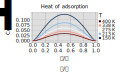

In [35]:
myplot_ninj = plot(

#     GCMC
#     layer(x=df_gcmc[:n], y=df_gcmc[:cov_n1n2], Geom.point, Theme(default_color=colorant"green")),
    Guide.xlabel("𝑛/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.yticks(ticks=collect(0.0:0.025:0.1)),
    Guide.ylabel("Cov(𝑛<sub>1</sub>, 𝑛<sub>2</sub>)"),

    # Exact soln
    [layer(x=dfs_T[i][:n], y=dfs_T[i][:cov_n1n2], Geom.line, 
        Theme(default_color=colors[i], line_width=.7mm)) for i = 1:length(Ts)]...,
    Guide.xlabel("𝑛/𝑀"),
    Guide.xticks(ticks=collect(0.0:0.2:1.0)),
    Guide.title("Heat of adsorption"),
    Theme(panel_fill=RGB(214./255.0, 214./255.0,214./255.0), 
      panel_opacity=0.8,
      grid_color=colorant"Gray",
      panel_stroke=colorant"black",
      background_color=colorant"white",
      line_width=.7mm, major_label_font_size=15pt, minor_label_font_size=14pt,
      key_label_font_size=13pt, key_title_font_size=16pt,
      minor_label_color=colorant"black", major_label_color=colorant"black", 
      key_title_color=colorant"black", key_label_color=colorant"black"
    ),
    Guide.manual_color_key("T", 
        [@sprintf("%d K   ", Ts[i]) for i = 1:length(Ts)], 
        colors
    )
)

draw(SVG(12cm, 8cm), myplot_ninj)
draw(PDF("twosite_T.pdf", 12cm, 8cm), myplot_ninj)